<a href="https://colab.research.google.com/github/sarahlai30/Machine-Learning-INDE-577/blob/main/Supervised%20Learning/ADA_and_Gradient_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AdaBoost (Adaptive Boosting)

AdaBoosting works by sequentially training a series of weak classifiers (e.g., decision stumps) and adjusting the weights of training instances at each step.

# Gradient Boosting

While AdaBoost adjusts instance weights, Gradient Boosting improves the model by minimizing a loss function through a gradient descent-like approach. Each new predictor focuses on reducing the residual errors (differences between predicted and actual values) made by the previous model.

By iteratively refining predictions, both AdaBoost and Gradient Boosting turn weak learners into powerful ensemble models capable of handling complex datasets and reducing errors significantly.



We will be using the Digits Dataset to demonstrate **AdaBoosting**.

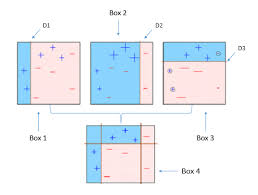

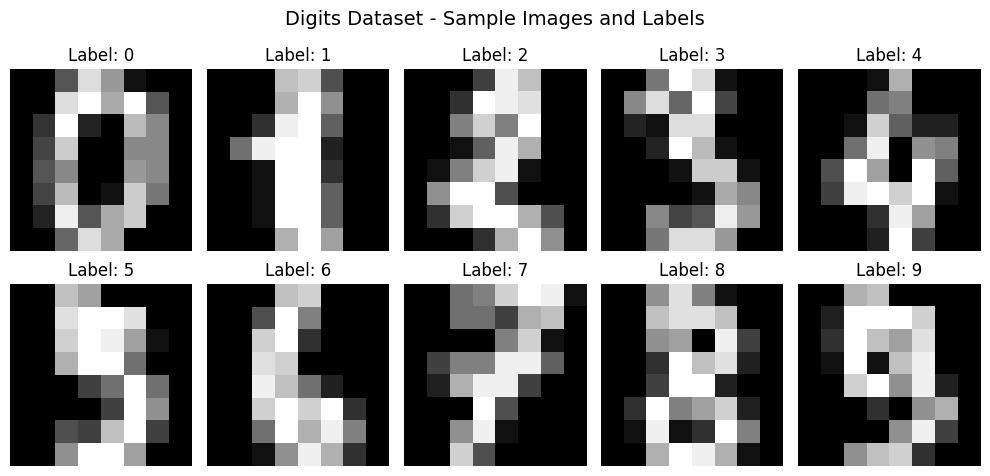

In [ ]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from mlxtend.plotting import plot_decision_regions

# Load the Digits Dataset
digits = load_digits()
X = digits.data  # Feature matrix (8x8 flattened pixel values)
y = digits.target  # Target labels (0-9)

# Visualize the First 10 Digits
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
fig.suptitle("Digits Dataset - Sample Images and Labels", fontsize=14)

for i, ax in enumerate(axes.ravel()):
    ax.imshow(X[i].reshape(8, 8), cmap="gray")  # Reshape the 64-dim vector into 8x8
    ax.set_title(f"Label: {y[i]}")
    ax.axis("off")

plt.tight_layout()
plt.show()

## Ada Boosting Steps

1. Train the First Classifier:

Initially, all data points are assigned equal weights.

2. Identify Misclassified Points:

Instances that were misclassified are assigned higher weights to indicate that they are harder to classify.

3. Train the Next Classifier:

A new classifier is trained, but focuses more on the misclassified instances by giving them higher weight.
4. Combine the Predictions

In [ ]:
# Train-Test Split for Classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
                                                    random_state=42)

# Define and Train AdaBoost Classifier
base_clf = DecisionTreeClassifier(max_depth=2)  # Weak base learner
clf = AdaBoostClassifier(estimator=base_clf, n_estimators=100, algorithm="SAMME")
clf.fit(X_train, y_train)

# Evaluate AdaBoost Performance
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"AdaBoost Classifier Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

AdaBoost Classifier Accuracy: 0.91

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        55
           1       0.92      0.85      0.89        55
           2       1.00      0.85      0.92        52
           3       0.91      0.91      0.91        56
           4       0.98      0.91      0.94        64
           5       0.89      0.85      0.87        73
           6       0.93      0.95      0.94        57
           7       0.97      0.97      0.97        62
           8       0.78      0.98      0.87        52
           9       0.82      0.91      0.86        68

    accuracy                           0.91       594
   macro avg       0.92      0.91      0.91       594
weighted avg       0.92      0.91      0.91       594

Confusion Matrix:
 [[53  0  0  0  0  2  0  0  0  0]
 [ 0 47  0  0  0  2  0  0  3  3]
 [ 0  0 44  3  0  0  0  0  5  0]
 [ 0  0  0 51  0  2  0  0  1  2]
 [ 0  3  0  0 58  0  2  0  1  

The classifier correctly predicted 91% of the test samples. This is a strong performance for a multiclass classification task.

Overall, the F1-scores, the harmonic mean of precision and recall, are balanced across classes, ranging between 0.87 and 0.98.



In order to visualize the decision boundaries, we have to reduce the high-dimensional data of the Digist dataset. To overcome this limitation, Principal Component Analysis (PCA) is applied:

PCA reduces the high-dimensional dataset to just 2 principal components that represent the directions of maximum variance in the dataset while preserving most of the information.

By selecting just two classes (0 and 1), we simplify the problem into a binary classification task.
This allows for clear decision boundaries to be visualized.

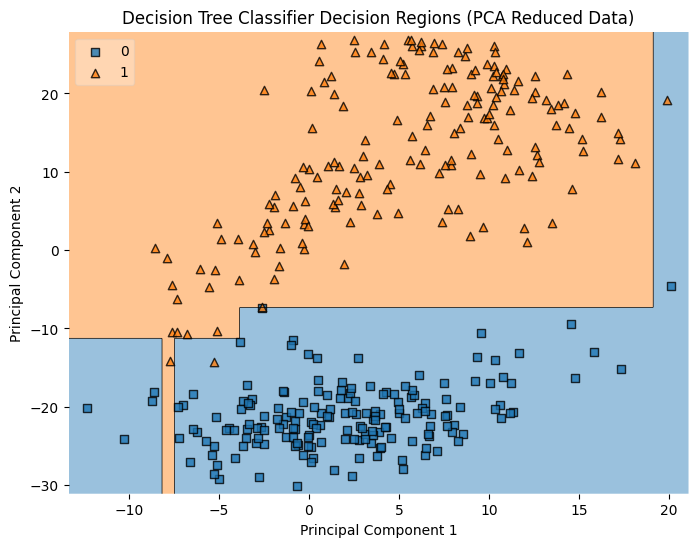

In [ ]:
# Reduce Dimensions with PCA for Visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

binary_mask = (y == 0) | (y == 1)  # Classes 0 and 1 for simplicity
X_binary = X_reduced[binary_mask]
y_binary = y[binary_mask]

# Train a Decision Tree Classifier for Visualization
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary,
                                                    test_size=0.3, random_state=42)
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(X_train, y_train)

# Visualize Decision Regions
plt.figure(figsize=(8, 6))
plot_decision_regions(X_binary, y_binary, clf=tree_clf, legend=2)
plt.title("Decision Tree Classifier Decision Regions (PCA Reduced Data)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

**Gradient Boosting**

Now we will conduct gradient boosting with the California Housing Dataset.

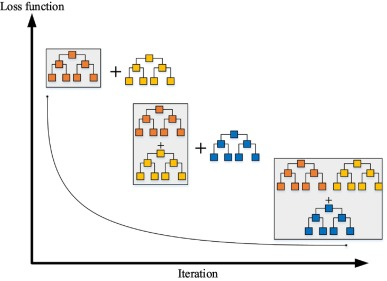

## Gradient Boosting Steps
1. Initialize the model with a constant value.
2. Compute residuals as errors from the current model.
3. Train a weak learner (small decision tree) on the residuals.
4. Update the model by adding scaled predictions of the weak learner.
5. Repeat steps 2–4 for several iterations.
6. Sum the predictions of all trees to get the final output.

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# Load the California Housing dataset
data_gbr = fetch_california_housing()
X_gbr = data.data  # Feature matrix (8 features)
y_gbr = data.target  # Target values (house prices)

# Split into training and testing data
X_train_gbr, X_test_gbr, y_train_gbr, y_test_gbr = train_test_split(X_gbr, y_gbr, test_size=0.3, random_state=42)

# Gradient Boosting-like Implementation (Manual Steps)
learning_rate = 0.05  # Increased learning rate for better convergence
n_stages = 300  # Increase the number of trees

# Initialize residuals
y_pred_train_gbr = np.zeros(len(y_train_gbr))
trees = []

# Train multiple trees sequentially
for stage in range(n_stages):
    residuals = y_train_gbr - y_pred_train_gbr
    tree = DecisionTreeRegressor(max_depth=4, random_state=42)  # Increased depth
    tree.fit(X_train_gbr, residuals)
    trees.append(tree)
    y_pred_train_gbr += learning_rate * tree.predict(X_train_gbr)

# Predict on the test set using the ensemble
y_pred_test_gbr = np.zeros(len(y_test_gbr))
for tree in trees:
    y_pred_test_gbr += learning_rate * tree.predict(X_test_gbr)

# Evaluate the model
mse = mean_squared_error(y_test_gbr, y_pred_test_gbr)
r2 = r2_score(y_test_gbr, y_pred_test_gbr)

print(f"Mean Squared Error: {mse:.3f}")
print(f"R² Score: {r2:.3f}")


Mean Squared Error: 0.239
R² Score: 0.818


The MSE value of 0.239 indicates that the average squared difference between the predicted and actual house prices is relatively low, showing that the model makes accurate predictions.

An R² score of 0.818 means that the Gradient Boosting Regressor explains approximately 81.8% of the variance in the target variable. This is a strong result, indicating the model's ability to capture patterns and relationships in the data.

In [ ]:
# Use Built-in GradientBoostingRegressor
gbr = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    random_state=42
)
gbr.fit(X_train_gbr, y_train_gbr)
y_pred_gbr = gbr.predict(X_test_gbr)

# Evaluate the built-in model
mse_gbr = mean_squared_error(y_test_gbr, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f"Mean Squared Error: {mse_gbr:.3f}")
print(f"R² Score: {r2_gbr:.3f}\n")

Mean Squared Error: 0.239
R² Score: 0.818



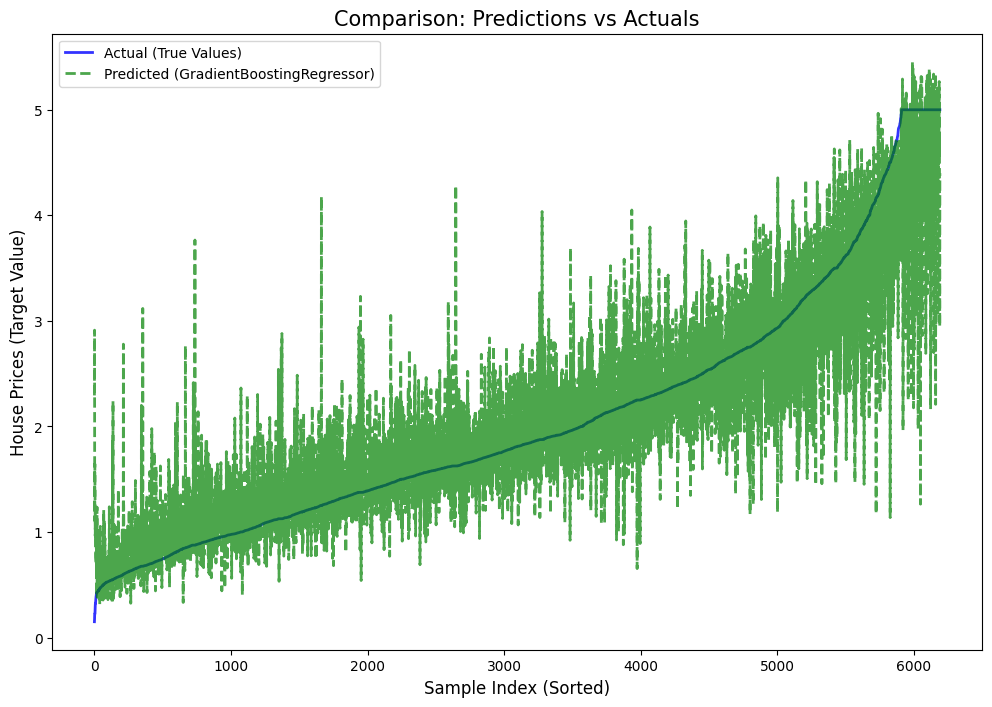

In [ ]:
# Visualization: Sort by True Values
sorted_idx = np.argsort(y_test)
y_test_sorted = y_test[sorted_idx]
y_pred_gbr_sorted = y_pred_gbr[sorted_idx]

# Plot Actual vs Predicted Values
plt.figure(figsize=(12, 8))

# Actual values
plt.plot(y_test_sorted, label="Actual (True Values)", color="blue", alpha=0.8, linewidth=2)

# Predicted Gradient Boosting Regressor
plt.plot(y_pred_gbr_sorted, label="Predicted (GradientBoostingRegressor)",
         color="green", alpha=0.7, linewidth=2, linestyle="--")


# Labels and title
plt.xlabel("Sample Index (Sorted)", fontsize=12)
plt.ylabel("House Prices (Target Value)", fontsize=12)
plt.title("Comparison: Predictions vs Actuals", fontsize=15)
plt.legend()
plt.show()


The two lines are closely aligned across most of the sample index, suggesting that the model's predictions are very close to the true values.

For lower house prices, the model predictions closely match the actual values, showing minimal error.
For higher house prices , the model continues to perform well, although there is slightly more variability, as evidenced by the spread in the green dashed line.

To further investigate the results, we conduct k-fold cross-validation.

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

k = 5  # Number of folds
kfold = KFold(n_splits=k, shuffle=True, random_state=42)

# scorer for Mean Squared Error
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform cross-validation
cv_scores = cross_val_score(gbr, X, y, cv=kfold, scoring=mse_scorer)

print(f"Mean Squared Errors for each fold: {-cv_scores}")  # Convert back to positive MSE
print(f"Average MSE: {np.mean(-cv_scores):.3f}")
print(f"Standard Deviation of MSE: {np.std(-cv_scores):.3f}")

Mean Squared Errors for each fold: [1.12147219 0.89543811 1.13325323 1.01975862 1.30689995]
Average MSE: 1.095
Standard Deviation of MSE: 0.136


The small standard deviation indicates that the model generalizes well across different subsets of the data. An average MSE of 1.095 suggests the model has reasonable predictive accuracy but may still benefit from hyperparameter tuning or feature engineering to reduce errors further.
